In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

july = pd.read_csv('tomslee_airbnb_new_york_1438_2017-07-12.csv')
july = july.drop(['room_id','survey_id', 'host_id', 'country', 'city', 'bathrooms', 'minstay', 'last_modified', 'location', 'name'], 1)
july.head()

,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,property_type,latitude,longitude
0,Shared room,Queens,Jackson Heights,6,5.0,4,1.0,85.0,House,40.749909,-73.876880
1,Shared room,Brooklyn,Cypress Hills,14,4.0,6,1.0,90.0,House,40.678527,-73.889584
2,Shared room,Brooklyn,Sheepshead Bay,3,4.5,6,1.0,239.0,Apartment,40.583041,-73.957976
3,Shared room,Manhattan,Hell's Kitchen,35,5.0,2,1.0,165.0,Apartment,40.758374,-73.991955
4,Shared room,Manhattan,Upper East Side,0,0.0,2,1.0,159.0,Apartment,40.761960,-73.959733


In [10]:
prop_dict = {}
for prop_type in july.property_type.unique():
    prop_dict[prop_type] = 'Other'

prop_dict['Apartment'] = 'Apartment'
prop_dict['Bed & Breakfast'] = 'Bed & Breakfast'
prop_dict['Serviced Apartment'] = 'Apartment'
prop_dict['Casa particular'] = 'Bed & Breakfast'
prop_dict['Loft'] = 'Loft'
prop_dict['Townhouse'] = 'Townhouse'
prop_dict['Condominium'] = 'Condominium'
prop_dict['House'] = 'House'

july.property_type.replace(prop_dict, inplace=True)

july = july[july.price < 500]
july = july[july.bedrooms < 50]
july = july[july.overall_satisfaction >= 3]

july_y = july.price
july_dumb = july.drop(['price', 'latitude', 'longitude'],1)
july_x = pd.get_dummies(july_dumb, drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Xrf, Xtestrf, yrf, ytestrf = train_test_split(july_x.values, july_y.values, test_size=.3, random_state=42)

#estimators = range(10, 300, 10)
#r2 = []
#for i in estimators:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(Xrf, yrf)
y_pred = rf.predict(Xtestrf)
print(r2_score(ytestrf, y_pred))
#r2.append(r2_score(ytestrf, y_pred))
#plt.plot(estimators, r2)

0.581749855942


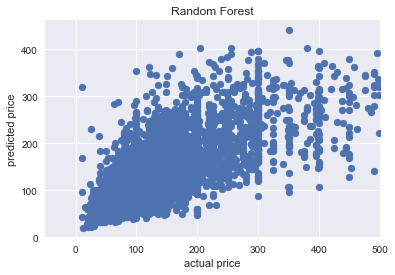

In [13]:
y_pred = rf.predict(Xtestrf)
#plt.ylin((-50,1000))
plt.xlim((-50,500))
plt.scatter(x=ytestrf, y=y_pred)
plt.title('Random Forest')
plt.ylabel('predicted price')
plt.xlabel('actual price')
plt.show()


In [14]:
print(len(july_y))

23647
